In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


# Mục mới

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 2.38MB/s]


In [ ]:
! unzip titanic.zip -d titanic

Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       


In [ ]:
titanic_data = pd.read_csv('titanic/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.corr()

<ipython-input-7-d6a665489a2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-8-06709c011f2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), cmap = 'YlGnBu')


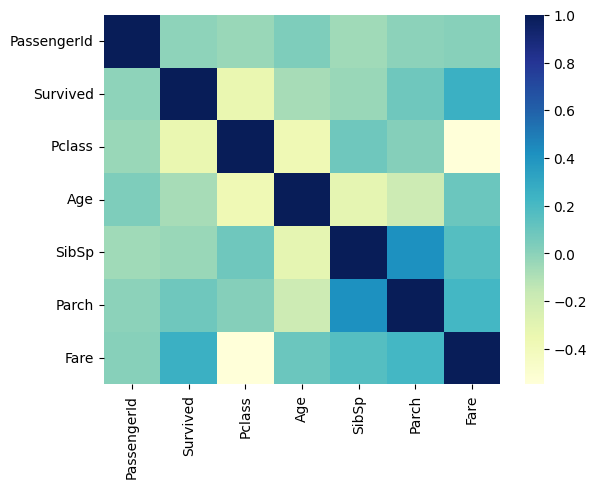

In [ ]:
sns.heatmap(titanic_data.corr(), cmap = 'YlGnBu')
plt.show()

In [ ]:
 titanic_data.shape

(891, 12)

In [ ]:
# from ssl import SSLSyscallError
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=1, test_size= 0.2)

# for train_indices,test_indices in sss.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
#   strat_train_set = titanic_data.loc[train_indices]
#   strat_test_set = titanic_data.loc[test_indices]


In [ ]:
# from sklearn.impute import SimpleImputer

# class AgeImputer(SimpleImputer):
#   def transform(self,X):
#     imputer = SimpleImputer(strategy = 'mean')
#     X['Age'] = imputer.fit_transform(X[['Age']])
#     return X

In [ ]:
class AgeImputer(BaseEstimator, TransformerMixin):

  def fit(self,X,y = None):
    return self

  def transform(self,X):
    imputer = SimpleImputer(strategy = 'mean')
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
      return self

    def transform(self,X):
      encoder = OneHotEncoder()
      matrix = encoder.fit_transform(X[['Embarked']]).toarray()
      column_names = ["C", "S", "Q", "N"]

      for i in range(len(matrix.T)):
        X[column_names[i]] = matrix.T[i]

      matrix = encoder.fit_transform(X[['Sex']]).toarray()
      column_names = ['Female', 'Male']

      for i in range(len(matrix.T)):
        X[column_names[i]] = matrix.T[i]

      return X


class number(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
      return self

    def transform(self,X):
      X.replace({'Sex':{'female':0, 'male':1}, 'Embarked':{"C":0, "S":1, "Q":2, "N":3}},inplace=True)
      return X

class FreatureDrop(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N', 'PassengerId'], axis=1, errors = 'ignore')

def XY_split_scale(data):
  X_final = data.drop('Survived', axis = 1)
  Y_final = data['Survived']
  scaler = scaler = StandardScaler()
  X_data_final = scaler.fit_transform(X_final)
  Y_data_final = Y_final.to_numpy()
  return X_data_final, Y_data_final

In [ ]:
preprocessing_pipeline = Pipeline([("ageimputer", AgeImputer()),
                                   ("FeatureEncoder", FeatureEncoder()),
                                   ('FreatureDrop', FreatureDrop())
                                   ])

In [ ]:
Titanic_prepare = preprocessing_pipeline.fit_transform(titanic_data)
# Nghĩa là pipeline sẽ truyền Train vào từng bước được định nghĩa như trên

In [ ]:
Titanic_prepare

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

Train, Test =  train_test_split(Titanic_prepare, test_size = 0.2, stratify = Titanic_prepare[['Survived', 'Pclass', 'Male', 'Female']])

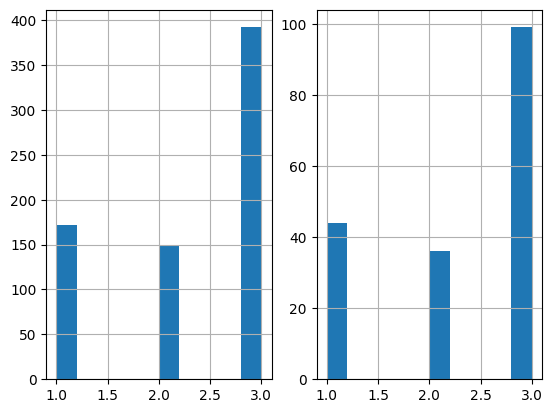

In [ ]:
#check whether if 2 datset have the same distribution or not

plt.subplot(1,2,1)

Train['Pclass'].hist()


plt.subplot(1,2,2)

Test['Pclass'].hist()


plt.show()

In [ ]:
X_Train, Y_Train = XY_split_scale(Train)

In [ ]:
X_Train

array([[ 0.82789342, -0.59369766, -0.46318507, ..., -1.58894697,
        -0.73561236,  0.73561236],
       [ 0.82789342,  0.00901628, -0.46318507, ..., -1.58894697,
        -0.73561236,  0.73561236],
       [-1.56828591,  0.00901628, -0.46318507, ..., -1.58894697,
         1.35941164, -1.35941164],
       ...,
       [-1.56828591, -0.90683169,  0.4790657 , ..., -1.58894697,
         1.35941164, -1.35941164],
       [-1.56828591, -0.12399661, -0.46318507, ...,  0.62934762,
        -0.73561236,  0.73561236],
       [ 0.82789342, -0.43713064,  1.42131648, ...,  0.62934762,
        -0.73561236,  0.73561236]])

In [ ]:
clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10,100,200,500], 'max_depth': [None, 5, 15, 15], 'min_samples_split': [2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring = 'accuracy', return_train_score = True)
grid_search.fit(X_Train, Y_Train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 15, 15],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [ ]:
X_Test, Y_Test = XY_split_scale(Test)

In [ ]:
final_clf.score(X_Test, Y_Test)

0.8324022346368715

In [ ]:
X_final, Y_final = XY_split_scale(Titanic_prepare)

In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10,100,200,500], 'max_depth': [None, 5, 15, 15], 'min_samples_split': [2,3,4]}
]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring = 'accuracy', return_train_score = True)
grid_search.fit(X_final, Y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 15, 15],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [ ]:
Test_data = pd.read_csv('titanic/test.csv')


In [ ]:
Submit_data = preprocessing_pipeline.fit_transform(Test_data)

In [ ]:
Submit_data.isna().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
C         0
S         0
Q         0
Female    0
Male      0
dtype: int64

In [ ]:
Submit_data = Submit_test_data.fillna(method = 'ffill')

In [ ]:
Submit_data

,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
scaler = StandardScaler()
Submit_train_data = scaler.fit_transform(Submit_data)

In [ ]:
predictions = prod_final_clf.predict(Submit_train_data)

In [ ]:
final =  pd.DataFrame(Test_data["PassengerId"])
final['Survived'] = predictions
final.to_csv('titanic/predictions.csv', index = False)

In [ ]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
